In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
df = pd.read_csv('Covid19_KOR_2.csv')

In [4]:
time = df.iloc[:,0]
I = df.iloc[:,4]
R = df.iloc[:,10]

In [5]:
t = time.values
i = I.values
r = R.values
t_train = torch.from_numpy(t).float()
r_train = torch.from_numpy(r).float()
i_train = torch.from_numpy(i).float()
T_train = t_train.view(100,1)
R_train = r_train.view(100,1)
I_train = i_train.view(100,1)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,32)
        self.fc4 = nn.Linear(32,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

In [7]:
model = Net()

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.002)

In [9]:
nb_epochs = 250000
for epoch in range(nb_epochs+1):
    prediction_I = model(T_train)
    cost = F.mse_loss(prediction_I, I_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('Epoch {:4d}/{} Cost:{:6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/250000 Cost:0.508757
Epoch 10000/250000 Cost:0.023441
Epoch 20000/250000 Cost:0.002238
Epoch 30000/250000 Cost:0.000721
Epoch 40000/250000 Cost:0.000446
Epoch 50000/250000 Cost:0.000326
Epoch 60000/250000 Cost:0.000263
Epoch 70000/250000 Cost:0.000222
Epoch 80000/250000 Cost:0.000190
Epoch 90000/250000 Cost:0.000158
Epoch 100000/250000 Cost:0.000133
Epoch 110000/250000 Cost:0.000114
Epoch 120000/250000 Cost:0.000100
Epoch 130000/250000 Cost:0.000089
Epoch 140000/250000 Cost:0.000081
Epoch 150000/250000 Cost:0.000074
Epoch 160000/250000 Cost:0.000070
Epoch 170000/250000 Cost:0.000066
Epoch 180000/250000 Cost:0.000063
Epoch 190000/250000 Cost:0.000061
Epoch 200000/250000 Cost:0.000059
Epoch 210000/250000 Cost:0.000057
Epoch 220000/250000 Cost:0.000056
Epoch 230000/250000 Cost:0.000055
Epoch 240000/250000 Cost:0.000054
Epoch 250000/250000 Cost:0.000053


In [10]:
nb_epochs = 250000
for epoch in range(nb_epochs+1):
    prediction_R = model(T_train)
    cost = F.mse_loss(prediction_R, R_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('Epoch {:4d}/{} Cost:{:6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/250000 Cost:0.230143
Epoch 10000/250000 Cost:0.000024
Epoch 20000/250000 Cost:0.000021
Epoch 30000/250000 Cost:0.000018
Epoch 40000/250000 Cost:0.000016
Epoch 50000/250000 Cost:0.000015
Epoch 60000/250000 Cost:0.000014
Epoch 70000/250000 Cost:0.000013
Epoch 80000/250000 Cost:0.000013
Epoch 90000/250000 Cost:0.000013
Epoch 100000/250000 Cost:0.000012
Epoch 110000/250000 Cost:0.000013
Epoch 120000/250000 Cost:0.000013
Epoch 130000/250000 Cost:0.000012
Epoch 140000/250000 Cost:0.000012
Epoch 150000/250000 Cost:0.000012
Epoch 160000/250000 Cost:0.000012
Epoch 170000/250000 Cost:0.000012
Epoch 180000/250000 Cost:0.000012
Epoch 190000/250000 Cost:0.000012
Epoch 200000/250000 Cost:0.000012
Epoch 210000/250000 Cost:0.000012
Epoch 220000/250000 Cost:0.000012
Epoch 230000/250000 Cost:0.000012
Epoch 240000/250000 Cost:0.000012
Epoch 250000/250000 Cost:0.000012


In [11]:
pre_I = prediction_I.detach()
pre_R = prediction_R.detach()
t = T_train.view(100)
i = pre_I.view(100)
r = pre_R.view(100)
day = t.numpy()
infector = i.numpy()
remove = r.numpy()

In [12]:
from matplotlib import style
style.use('ggplot')

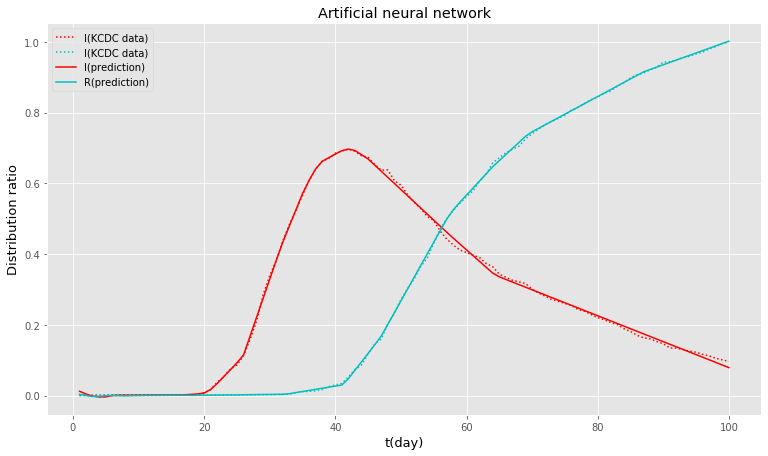

In [13]:
plt.figure(figsize=(12.8, 7.2))
plt.title("Artificial neural network")
plt.plot(time, I, 'r:', label='I(KCDC data)')
plt.plot(time, R, 'c:', label='I(KCDC data)')
plt.plot(day, infector, 'r-', label='I(prediction)')
plt.plot(day, remove, 'c-', label='R(prediction)')
plt.xlabel('t(day)',  {'color': 'k', 'fontsize': 13})
plt.ylabel('Distribution ratio', {'color': 'k', 'fontsize': 13})
plt.legend()
plt.savefig('Ann.png', dpi=300)
plt.show()